In [1]:
import numpy as np
from matplotlib import pyplot as plt
file1 = open("hw1_6_train","r")
line = "start"
x = []
y = []

while 1:
    line = file1.readline()
    if not line:
        break
    line = line.replace('\t',' ')
    line = line.replace('\n','')
    line = line.split(" ")
    x.append([1]+[float(j) for j in line ])# 1 for x0
file1.close()

In [2]:
for i in x:
    print(i)

[1, 0.97681, 0.10723, 0.64385, 0.29556, 1.0]
[1, 0.67194, 0.2418, 0.83075, 0.42741, 1.0]
[1, 0.20619, 0.23321, 0.81004, 0.98691, 1.0]
[1, 0.51583, 0.055814, 0.92274, 0.75797, 1.0]
[1, 0.70893, 0.10836, 0.33951, 0.77058, 1.0]
[1, 0.55743, 0.67804, 0.061044, 0.72689, 1.0]
[1, 0.15654, 0.75584, 0.01122, 0.42598, -1.0]
[1, 0.50462, 0.15137, 0.33878, 0.41881, 1.0]
[1, 0.22657, 0.59272, 0.24103, 0.46221, -1.0]
[1, 0.49174, 0.65115, 0.24622, 0.24796, -1.0]
[1, 0.59512, 0.26994, 0.74692, 0.32784, 1.0]
[1, 0.32439, 0.37294, 0.11623, 0.94499, 1.0]
[1, 0.4475, 0.60183, 0.41323, 0.58492, 1.0]
[1, 0.41171, 0.098584, 0.4795, 0.083842, -1.0]
[1, 0.10059, 0.37353, 0.0057687, 0.14313, -1.0]
[1, 0.8182, 0.70052, 0.67561, 0.22231, 1.0]
[1, 0.3221, 0.95754, 0.99328, 0.50757, 1.0]
[1, 0.41469, 0.48406, 0.39832, 0.53216, 1.0]
[1, 0.48364, 0.36163, 0.14351, 0.3153, -1.0]
[1, 0.5323, 0.21312, 0.40401, 0.98252, 1.0]
[1, 0.71073, 0.29015, 0.15557, 0.70588, 1.0]
[1, 0.68151, 0.23617, 0.085193, 0.58718, 1.0]
[1, 

In [3]:
def pla(dataset, order):
    w = [0, 0, 0, 0, 0] #initialize w0
    update_count = 0
    
    while True:
        completed = True
        for i in order:
            Y = 0
            Y = np.dot(w, dataset[i][:len(w)])
            if np.sign(Y) != dataset[i][-1]:
                for k in range(len(w)):
                    w[k] += dataset[i][-1]*dataset[i][k]
                completed = False 
                update_count += 1
        if completed == True:
            break
    return update_count, w

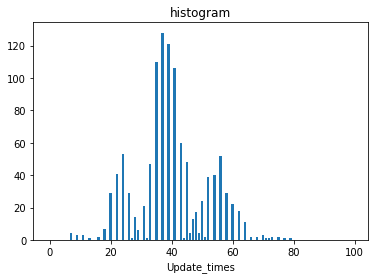

In [4]:
import random
order = []
for i in range(400):
    order.append(i)
    
histogram = [0]*100

for i in range(1126):
    random.shuffle(order)
    update_times, w = pla(x, order)
    histogram[update_times] += 1

plt.bar(range(len(histogram)) , histogram) 
plt.xlabel('Update_times')
plt.ylabel('')
plt.title('histogram')
plt.show()

In [22]:
def pocket_pla(dataset, iteration):
    order = []
    for i in range(len(dataset)):
        order.append(i)
    random.shuffle(order)
    update = 0
    w = [0, 0, 0, 0, 0]
    w_tmp = w
    err_w = len(dataset)
    while update < iteration:
        change = 0
        for i in order:
            Y = np.dot(w_tmp, dataset[i][:len(w)])
            if np.sign(Y) != dataset[i][-1]:
                for k in range(len(w)):
                    w_tmp[k] += dataset[i][-1]*dataset[i][k]
                change = 1
                update += 1
                err_wtmp = 0
                for j in range(len(dataset)):
                    if  np.sign(np.dot(w_tmp, dataset[j][:len(w)])) != dataset[j][-1]:
                        err_wtmp += 1
                if err_wtmp < err_w:
                    err_w = err_wtmp
                    w = w_tmp
        if change == 0:
            print("update:", update)
            break
    return w


In [23]:
file1 = open("hw1_7_train","r")
line = "start"
x = []

while 1:
    line = file1.readline()
    if not line:
        break
    line = line.replace('\t',' ')
    line = line.replace('\n','')
    line = line.split(" ")
    x.append([1]+[float(j) for j in line ])# 1 for x0
file1.close()


In [49]:
x_test = []
file1 = open("hw1_7_test","r")
line = "start"
while 1:
    line = file1.readline()
    if not line:
        break
    line = line.replace('\t',' ')
    line = line.replace('\n','')
    line = line.split(" ")
    x_test.append([1]+[float(j) for j in line ])# 1 for x0
file1.close()
histogram = []

w = pocket_pla(x, 100)
err_w = 0
for j in range(10):
    err_w = 0
    w = pocket_pla(x, 100)
    for i in range(len(x_test)):
        if np.sign(np.dot(w, x_test[i][:len(w)])) != x_test[i][-1]:
            err_w += 1
    print(err_w/len(x_test))


0.294
0.13
0.162
0.114
0.208
0.212
0.128
0.154
0.12
0.12


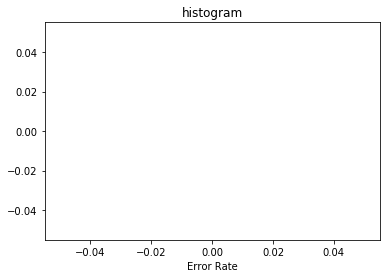

In [8]:
plt.bar(range(len(histogram)) , histogram) 
plt.xlabel('Error Rate')
plt.ylabel('')
plt.title('histogram')
plt.show()